# Import Packages

In [1]:
# Add environment Packages paths to conda
import os, sys
# env_name = "food_review"
# sys.path.append(f"C:\\Environments\\{env_name}\\lib\\site-packages\\")

import pandas as pd
import numpy as np

# Text preprocessing packages
import nltk # Text libarary
# nltk.download('stopwords')
import string # Removing special characters {#, @, ...}
import re # Regex Package
from nltk.corpus import stopwords # Stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer # Stemmer & Lemmatizer
from gensim.utils import simple_preprocess  # Text ==> List of Tokens

# Text Embedding
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Saving Model
import pickle

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline

C:\Users\Rozan Magdy\anaconda3\envs\food_review\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# Read Dataset

In [2]:
%%time
df = pd.read_csv('Reviews.csv')

Wall time: 7.6 s


In [3]:
f"{df.shape[0]:,} Review"

'568,454 Review'

In [4]:
cols = ['Text', 'Score']
df_text = df[cols].copy()
df_text.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


# Drop Duplicates

In [5]:
df_text=df_text.drop_duplicates()

In [6]:
df_text=df_text.reset_index(drop=True)
df_text

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5
...,...,...
393670,Great for sesame chicken..this is a good if no...,5
393671,I'm disappointed with the flavor. The chocolat...,2
393672,"These stars are small, so you can give 10-15 o...",5
393673,These are the BEST treats for training and rew...,5


# Target Variable Pre-Processing

In [7]:
df_text['target'] = df_text['Score'].apply(lambda x: 1 if (x >= 3)  else 0)

In [8]:
df_text['target']

0         1
1         0
2         1
3         0
4         1
         ..
393670    1
393671    0
393672    1
393673    1
393674    1
Name: target, Length: 393675, dtype: int64

# Plot Countplot for target Variable¶

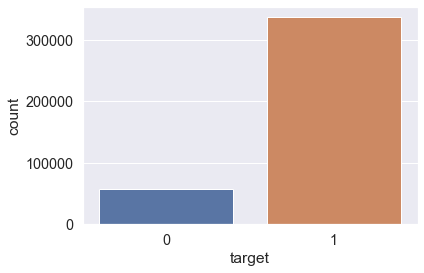

In [9]:
ax = sns.countplot(x="target", data=df_text)

# Balance Data Target

In [10]:
# Sample from positive reviews Same number of negative reviews
NEG_N = df_text.target.value_counts()[0]
df_pos = df_text[df_text['target'] == 1]['Text'].sample(NEG_N, replace=False)
df_text_balanced = pd.concat([df_text.iloc[df_pos.index], df_text[df_text.target == 0]])

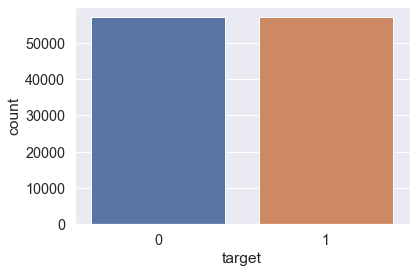

In [11]:
ax = sns.countplot(x="target", data=df_text_balanced)

# Text Pre-Processing

In [12]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
lemmatizer= WordNetLemmatizer()

In [13]:
stop_words.remove('not')


In [14]:
df_text_balanced["Text"] = df_text_balanced["Text"].str.replace('[^\w\s]','')
df_text_balanced['Text']=df_text_balanced['Text'].str.lower().str.split()

<ipython-input-14-60c6f5b0f369>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text_balanced["Text"] = df_text_balanced["Text"].str.replace('[^\w\s]','')


In [15]:
df_text_balanced.head(5)

,Text,Score,target
367885,"[when, my, motherinlaw, purchased, light, rice...",5,1
328162,"[great, product, its, great, being, able, to, ...",5,1
204084,"[end, product, was, kind, of, a, surprise, les...",3,1
95233,"[i, love, this, tea, but, couldnt, get, it, in...",5,1
330201,"[collegen, is, central, for, maintaining, a, h...",5,1


In [16]:
df_text_balanced['Text']=df_text_balanced['Text'].apply(lambda x: [item for item in x if item not in stop_words])

In [17]:
df_text_balanced

,Text,Score,target
367885,"[motherinlaw, purchased, light, rice, bread, e...",5,1
328162,"[great, product, great, able, mix, different, ...",5,1
204084,"[end, product, kind, surprise, less, seems, te...",3,1
95233,"[love, tea, couldnt, get, canada, bought, prod...",5,1
330201,"[collegen, central, maintaining, healthy, body...",5,1
...,...,...,...
393654,"[bought, soup, today, local, grocer, brought, ...",1,0
393655,"[soup, mostly, broth, although, kick, also, sw...",2,0
393656,"[mostly, broth, advertised, 34, cup, vegetable...",2,0
393667,"[ordered, months, back, great, latest, batch, ...",2,0


In [18]:
lemmatizer = WordNetLemmatizer()
df_text_balanced['Text'] = df_text_balanced['Text'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [19]:
stemmer = SnowballStemmer("english")
df_text_balanced['Text'] = df_text_balanced['Text'].apply(lambda x: [stemmer.stem(y) for y in x])

In [20]:
df_text_balanced['Text']= df_text_balanced['Text'].apply(lambda x : ' '.join(x))

In [21]:
df_text_balanced

,Text,Score,target
367885,motherinlaw purchas light rice bread expect ev...,5,1
328162,great product great abl mix differ flavor issu...,5,1
204084,end product kind surpris le seem tea gave majo...,3,1
95233,love tea couldnt get canada bought product gre...,5,1
330201,collegen central maintain healthi bodi particu...,5,1
...,...,...,...
393654,bought soup today local grocer brought back wo...,1,0
393655,soup most broth although kick also sweet tast ...,2,0
393656,most broth advertis 34 cup veget howev cup con...,2,0
393667,order month back great latest batch terribl an...,2,0


# Split Test & Training Data

In [22]:
X =df_text_balanced['Text'].values
y =df_text_balanced['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Text Embedding

In [23]:
vectorizer =TfidfVectorizer()
vectorizer_tfidf =vectorizer.fit(X_train)
X_train =vectorizer.transform(X_train)
X_test =vectorizer.transform(X_test)

In [24]:
# See the dimensions of your data embeddings before entering to the model
X_train.shape, X_test.shape

((79917, 75450), (34251, 75450))

# Modelling

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
## initialize your Model
clf =RandomForestClassifier(max_depth=25, random_state=0)
# Fit your Model on the Training Dataset
clf.fit(X_train, y_train)
# Predict on Test data
preds = clf.predict(X_test)
#Calculate Model Accuracy
acc = accuracy_score(preds, y_test)
print(f"Model Accuracy = {round(acc*100,2)}%")

Model Accuracy = 82.63%


# Raw Instance Prediction

In [27]:
def CleanReview(review) :
    stop_words = set(stopwords.words('english'))
    review= review.replace('[^\w\s]',' ')
    review=review.lower().split()
    review=set(review)
    set_without_stopwords=review.difference(stop_words)
    list_without_stopwords=list(set_without_stopwords)
    review_cleaned=list()
    for word in list_without_stopwords:
        review_cleaned.append(stemmer.stem(word))
        review_cleaned = [" ".join(review_cleaned)]
    return review_cleaned

In [28]:
def raw_test(review, model, vectorizer):
    # Clean Review
    review_c = CleanReview(review)
    # Embed review using tf-idf vectorizer
    embedding = vectorizer.transform(review_c)
    # Predict using your model
    prediction = clf.predict(embedding)
    # Return the Sentiment Prediction
    return "Positive" if prediction == 1 else "Negative"

In [29]:
review_1 = "That's a good Dish, Good Job"
review_2 = "That's the worst Dish ever tasted"

In [30]:
raw_test(review_1, clf, vectorizer_tfidf)

'Positive'

In [31]:
raw_test(review_2, clf, vectorizer_tfidf)

'Negative'

# Saving Models for Deployment

In [32]:
import pickle

In [33]:
model_name = 'rf_model.pk'
vectorizer_name = 'tfidf_vectorizer.pk'
model_path = os.path.join('/', model_name)
vect_path = os.path.join('/', vectorizer_name)
pickle.dump(clf, open(model_name, 'wb'))
pickle.dump(vectorizer_tfidf, open(vectorizer_name, 'wb'))

# Load model Again and test them

In [34]:
loaded_model = pickle.load(open(model_name, 'rb'))
loaded_vect =pickle.load(open(vectorizer_name, 'rb'))

In [35]:
raw_test(review_1, loaded_model, loaded_vect)

'Positive'

In [36]:
raw_test(review_2, loaded_model, loaded_vect)

'Negative'

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,preds)

array([[13892,  3181],
       [ 2769, 14409]], dtype=int64)